# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [9]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [22]:
from sklearn.model_selection import train_test_split as tts
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2)

print("shape of input - training set", X_train.shape)
print("shape of output - training set", X_test.shape)
print("shape of input - testing set", y_train.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (404, 13)
shape of output - training set (102, 13)
shape of input - testing set (404, 1)
shape of output - testing set (102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)
y_pred_test[:10], y_pred_train[:10]

(array([[ 8.38498397],
        [17.91165648],
        [23.42086097],
        [25.2668803 ],
        [34.48202627],
        [19.8697899 ],
        [17.6228186 ],
        [10.42675108],
        [35.76422283],
        [33.07405019]]),
 array([[34.70320462],
        [19.24492975],
        [15.62078947],
        [28.63887355],
        [25.50267719],
        [20.47455997],
        [24.9662181 ],
        [25.03279165],
        [19.47353082],
        [20.89944321]]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7485182806190529

## 4. Calculate and print mean squared error for both the training and the testing set.

In [50]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred_test))
mean_squared_error(y_train, y_pred_train)

19.145722916103228


22.957189232465716

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [52]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred_test))
mean_absolute_error(y_train, y_pred_train)

3.063873733013709


3.3895319937613677

## Classification Model Evaluation

In [64]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [76]:
X_train, X_test, y_train, y_test=tts(X, y, random_state=42)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", X_test.shape)
print("shape of input - testing set", y_train.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (112, 4)
shape of output - training set (38, 4)
shape of input - testing set (112, 1)
shape of output - testing set (38, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
logreg=LogisticRegression(max_iter=100)

logreg.fit(X_train, y_train)
y_pred_test=logreg.predict(X_test)   
y_pred_train=logreg.predict(X_train)
y_pred_train=y_pred_train

C:\Users\penzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [135]:
from sklearn.metrics import accuracy_score as acc
svc=SVC().fit(X_train, y_train)
y_pred_test=svc.predict(X_test)
y_pred_train=svc.predict(X_train)
print(acc(y_test, y_pred_test))
acc(y_train, y_pred_train)

1.0


C:\Users\penzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9553571428571429

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [136]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred_test)
balanced_accuracy_score(y_train, y_pred_train)

0.9570400359874044

## 10. Calculate and print the precision score for both the training and the testing set.

In [138]:
from sklearn.metrics import precision_score as prec

print(prec(y_test, y_pred_test, average='macro'))
prec(y_train, y_pred_train, average='macro')

1.0


0.9582204155374887

## 11. Calculate and print the recall score for both the training and the testing set.

In [139]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')
rec(y_train, y_pred_train, average='macro')

0.9570400359874044

## 12. Calculate and print the F1 score for both the training and the testing set.

In [140]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')
f1(y_train, y_pred_train, average='macro')

0.9566807313642757

## 13. Generate confusion matrices for both the training and the testing set.

In [141]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred)
cm(y_train, y_pred_train)

array([[35,  0,  0],
       [ 0, 35,  4],
       [ 0,  1, 37]], dtype=int64)

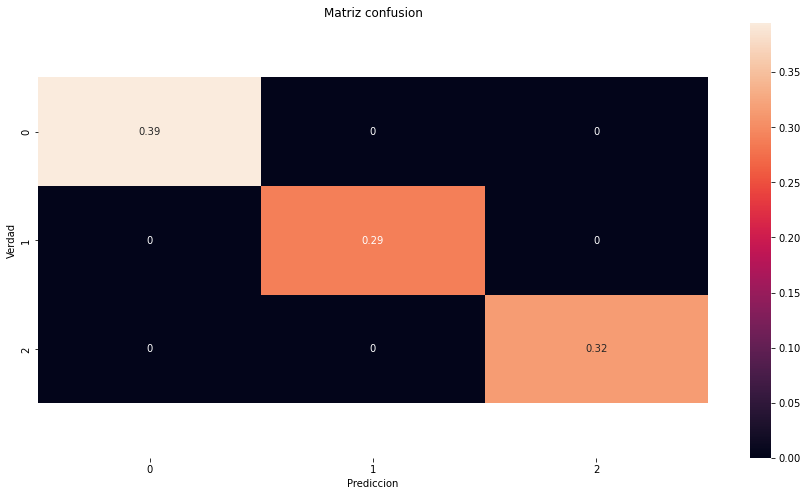

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

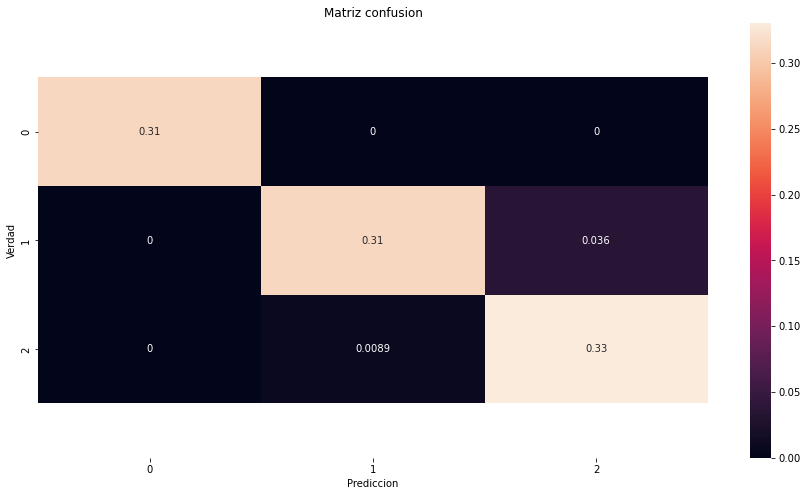

In [144]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train)/sum(sum(cm(y_train, y_pred_train))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.